       Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
count       100.000000             100.000000               100.000000   
mean          2.340000               1.730000                 2.680000   
std           0.986986               0.583528                 1.003831   
min           1.000000               1.000000                 1.000000   
25%           2.000000               1.000000                 2.000000   
50%           2.000000               2.000000                 2.000000   
75%           3.000000               2.000000                 3.000000   
max           5.000000               3.000000                 5.000000   

           Crowns      Roots  Cortical bone  Trabecular bone  Bone shape  \
count  100.000000  100.00000     100.000000       100.000000  100.000000   
mean     2.310000    2.09000       2.240000         2.480000    2.690000   
std      0.734366    0.51434       1.319014         1.058682    1.244747   
min      1.000000    1.00000 

<ipython-input-1-5bae1a385060>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Realism', data=df, palette='viridis')


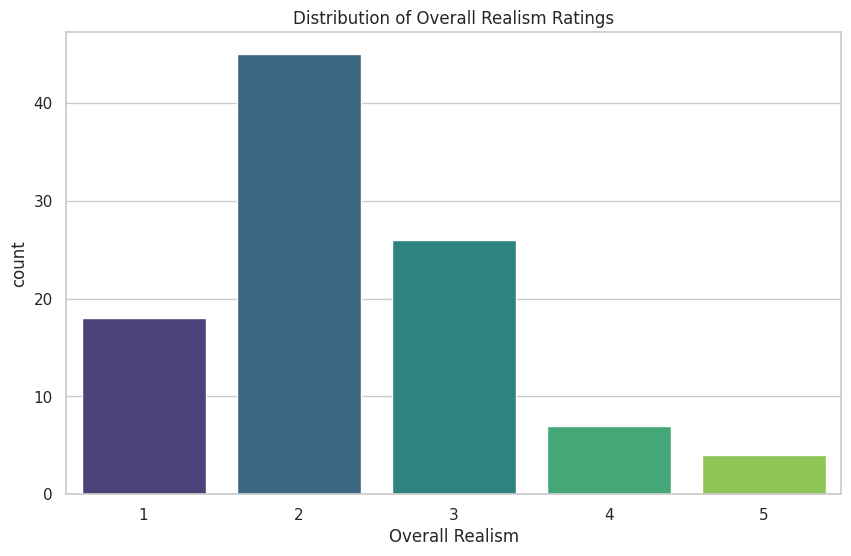

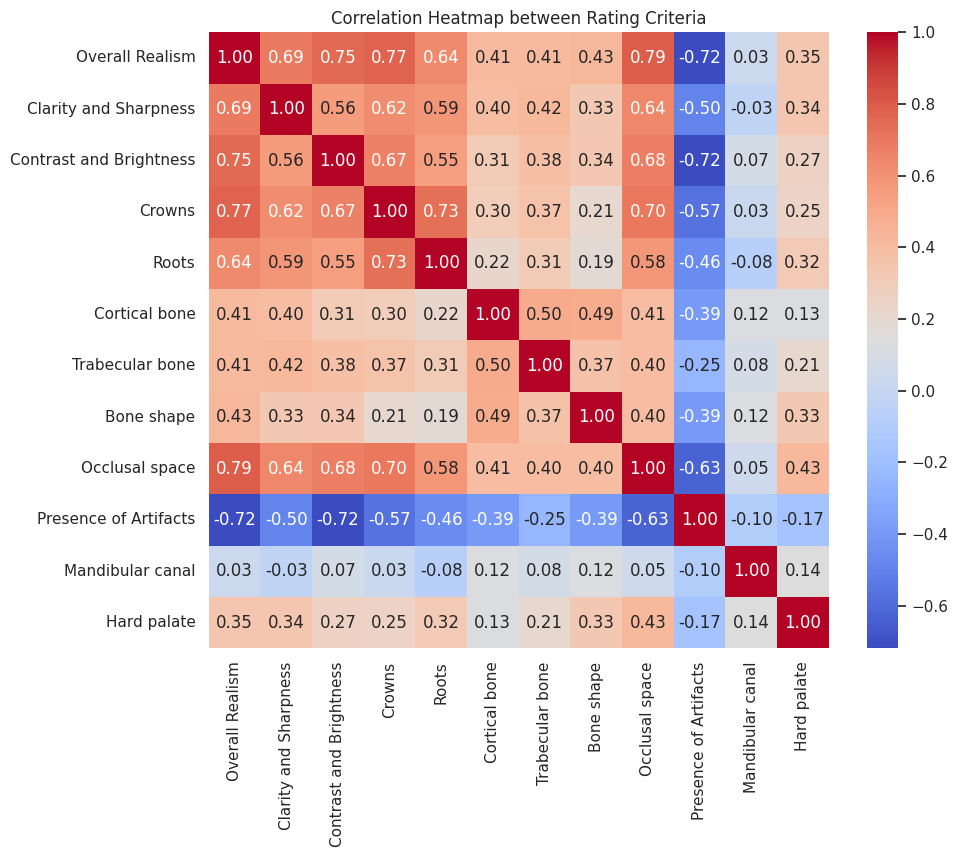

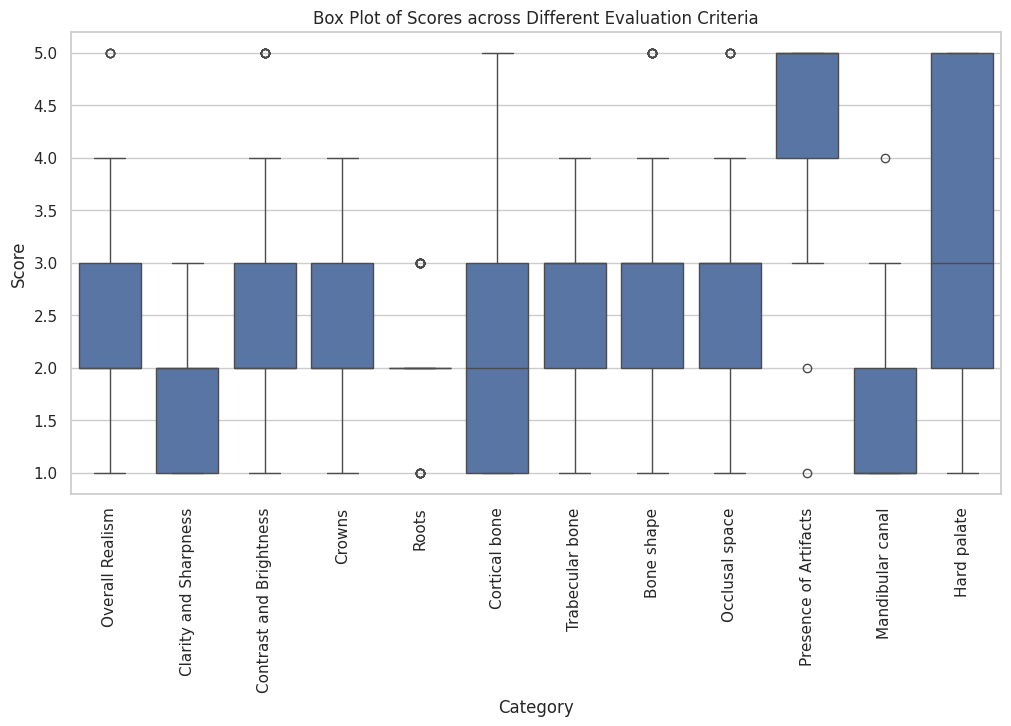

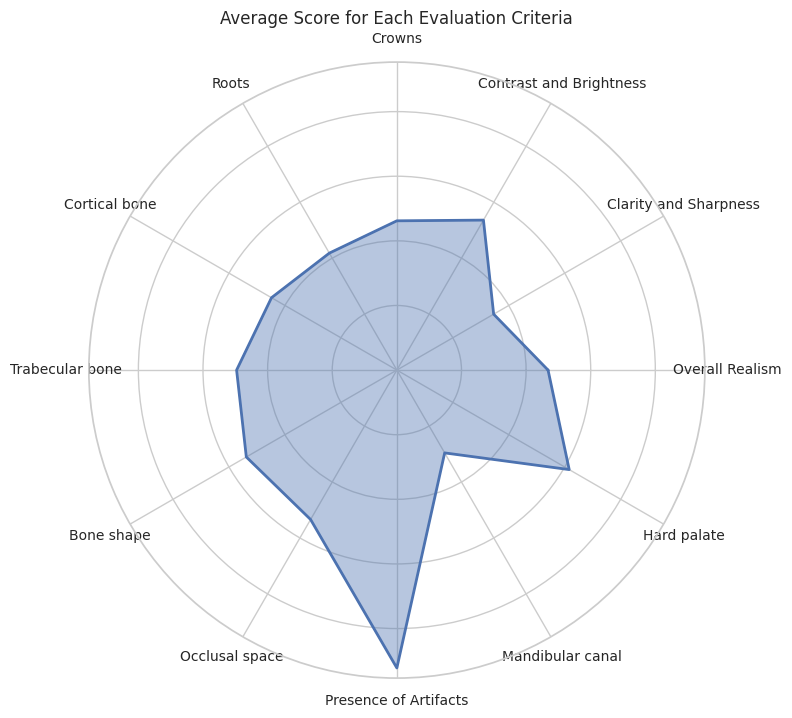

Top 5 images with highest Overall Realism:
    img_file  Overall Realism
0    image_1                5
1    image_2                5
7    image_8                5
84  image_85                5
13  image_14                4
Bottom 5 images with lowest Overall Realism:
    img_file  Overall Realism
6    image_7                1
8    image_9                1
10  image_11                1
20  image_21                1
21  image_22                1


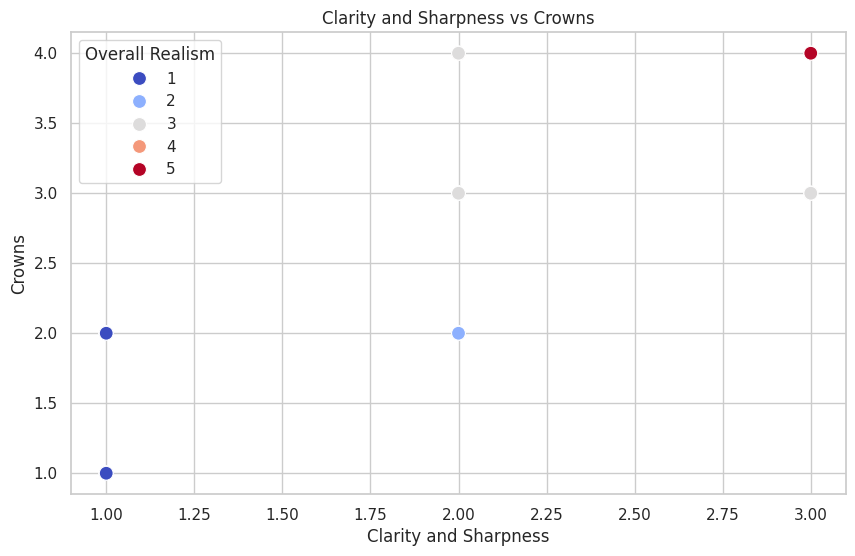

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
df = pd.read_excel('results.xlsx')  # Replace with the path to your Excel file

# Basic statistics of the dataset
print(df.describe())

# Set default plot style
sns.set(style="whitegrid")

# Plotting Overall Realism distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Overall Realism', data=df, palette='viridis')
plt.title('Distribution of Overall Realism Ratings')
plt.show()

# Heatmap of the correlation between all criteria
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Rating Criteria')
plt.show()

# Box plot to visualize the range of scores for each category
plt.figure(figsize=(12,6))
df_melted = df.melt(id_vars=['img_file'], var_name='Category', value_name='Score')
sns.boxplot(x='Category', y='Score', data=df_melted)
plt.xticks(rotation=90)
plt.title('Box Plot of Scores across Different Evaluation Criteria')
plt.show()

# Radar chart for the average performance across all evaluation metrics
from math import pi

# Data preparation for radar chart
categories = list(df.columns[1:])
N = len(categories)

# Calculate the average score for each category
values = df[categories].mean().tolist()
values += values[:1]  # Close the loop for the radar chart

# Angle of each axis in the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot and fill the radar chart
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, color='b', alpha=0.4)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45, size=10)
plt.title('Average Score for Each Evaluation Criteria')
plt.show()

# Individual image analysis (e.g., top 5 and bottom 5 images by Overall Realism)
top5_images = df.nlargest(5, 'Overall Realism')
bottom5_images = df.nsmallest(5, 'Overall Realism')

# Display the top 5 images with their scores
print("Top 5 images with highest Overall Realism:")
print(top5_images[['img_file', 'Overall Realism']])

# Display the bottom 5 images with their scores
print("Bottom 5 images with lowest Overall Realism:")
print(bottom5_images[['img_file', 'Overall Realism']])

# Scatter plot to show trends between criteria (e.g., Clarity vs. Crowns)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Clarity and Sharpness', y='Crowns', data=df, hue='Overall Realism', palette='coolwarm', s=100)
plt.title('Clarity and Sharpness vs Crowns')
plt.show()


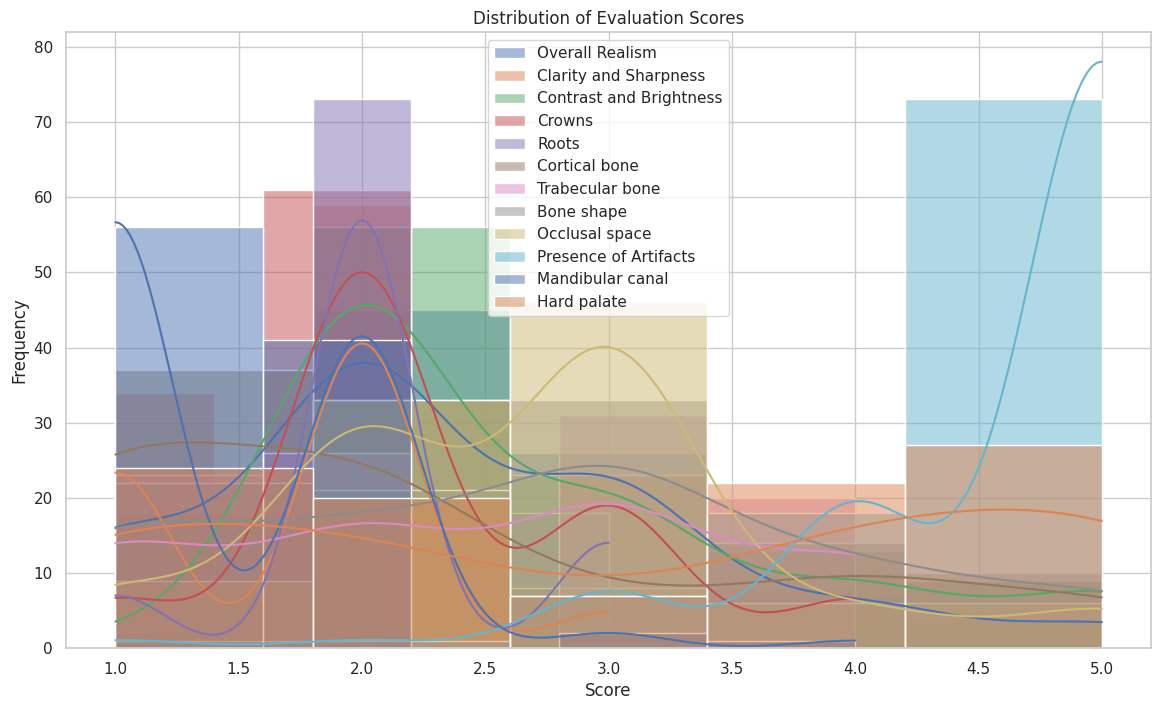

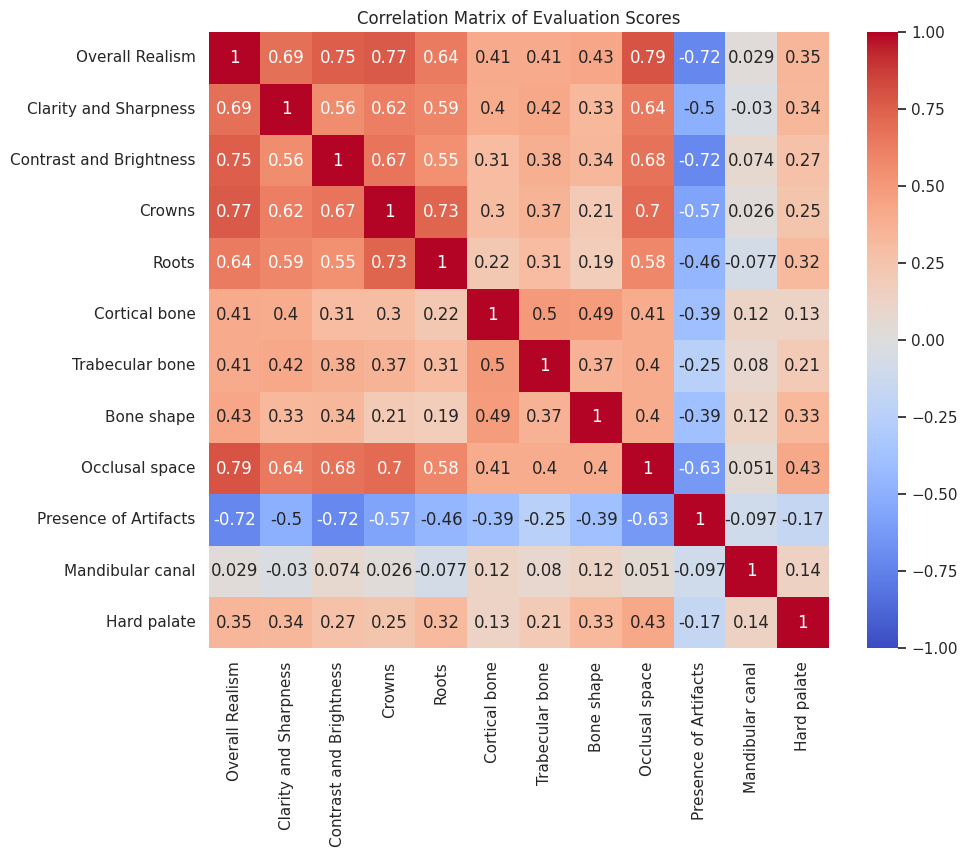

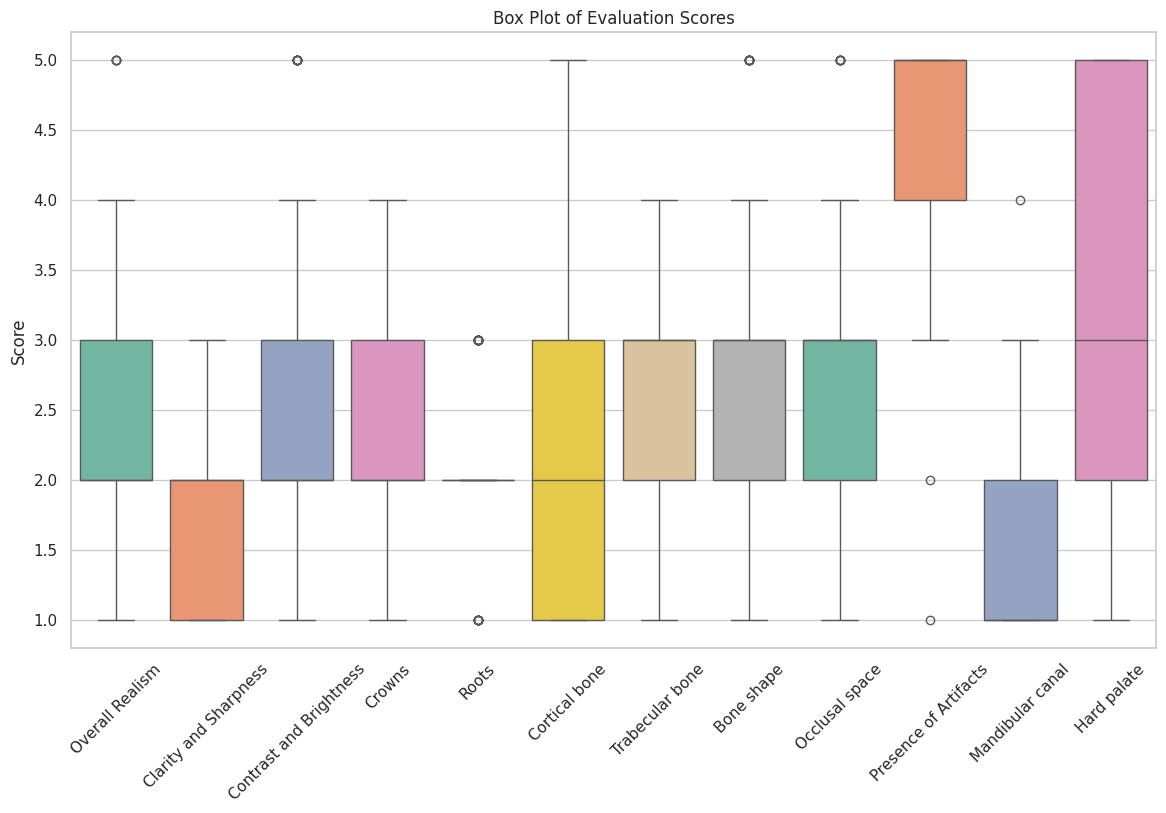

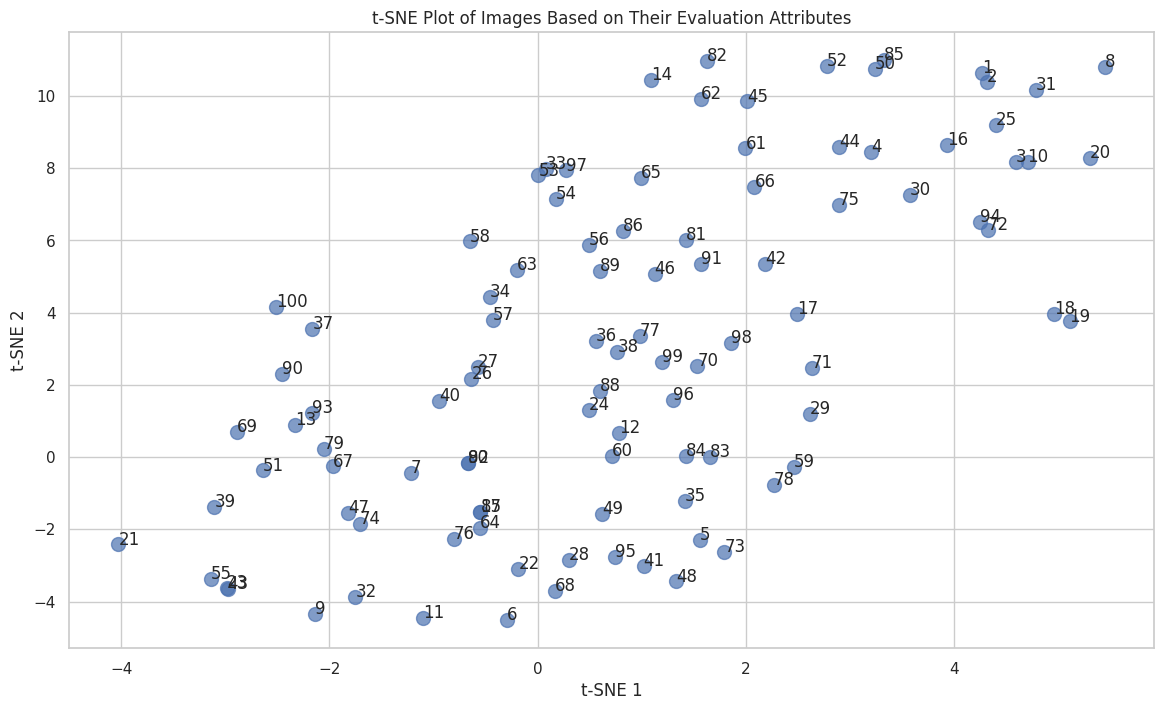

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5)
    plt.legend()
    plt.title('Distribution of Evaluation Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Evaluation Scores')
    plt.show()

# Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set2')
    plt.xticks(rotation=45)
    plt.title('Box Plot of Evaluation Scores')
    plt.ylabel('Score')
    plt.show()

# Plot 4: t-SNE Plot for Image Clustering
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Plot t-SNE results
    plt.figure(figsize=(14, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=100, alpha=0.7)

    # Annotate points with image file names
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]))

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness', 'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape', 'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


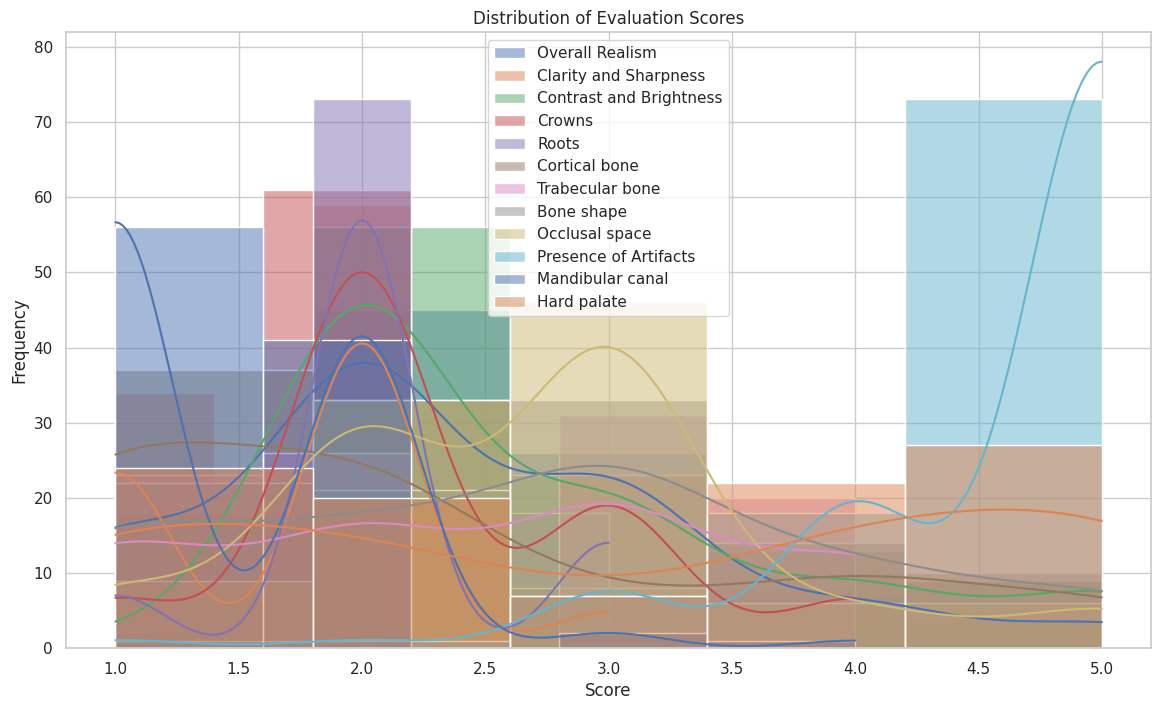

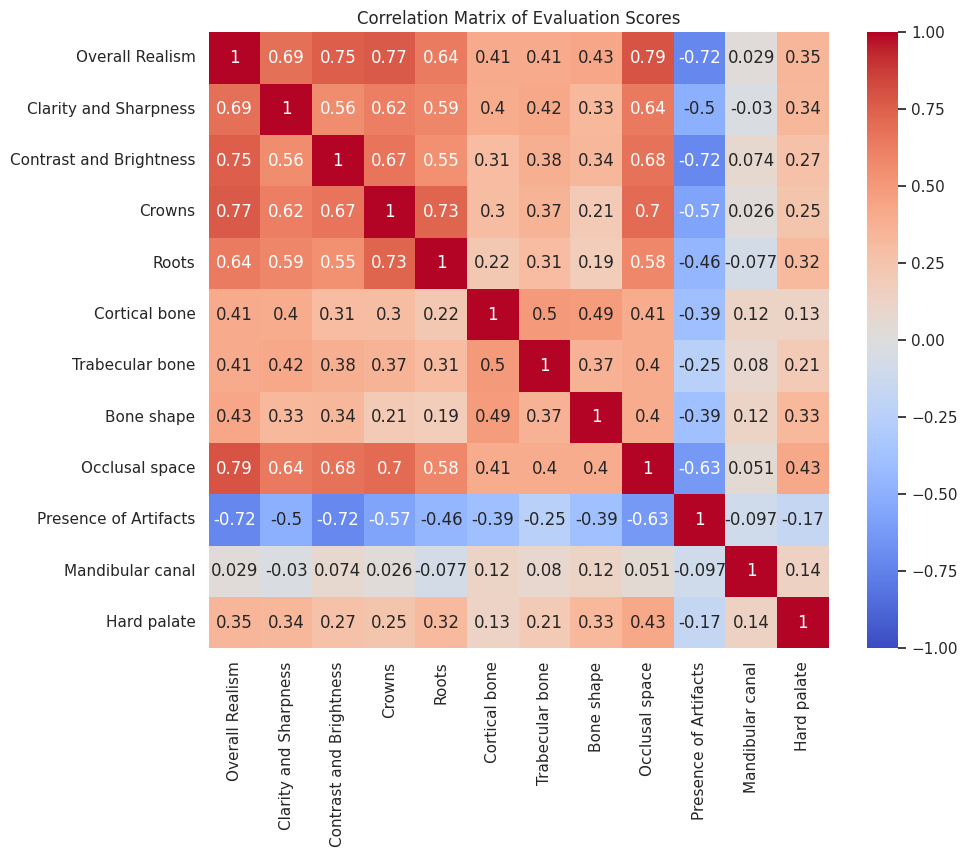

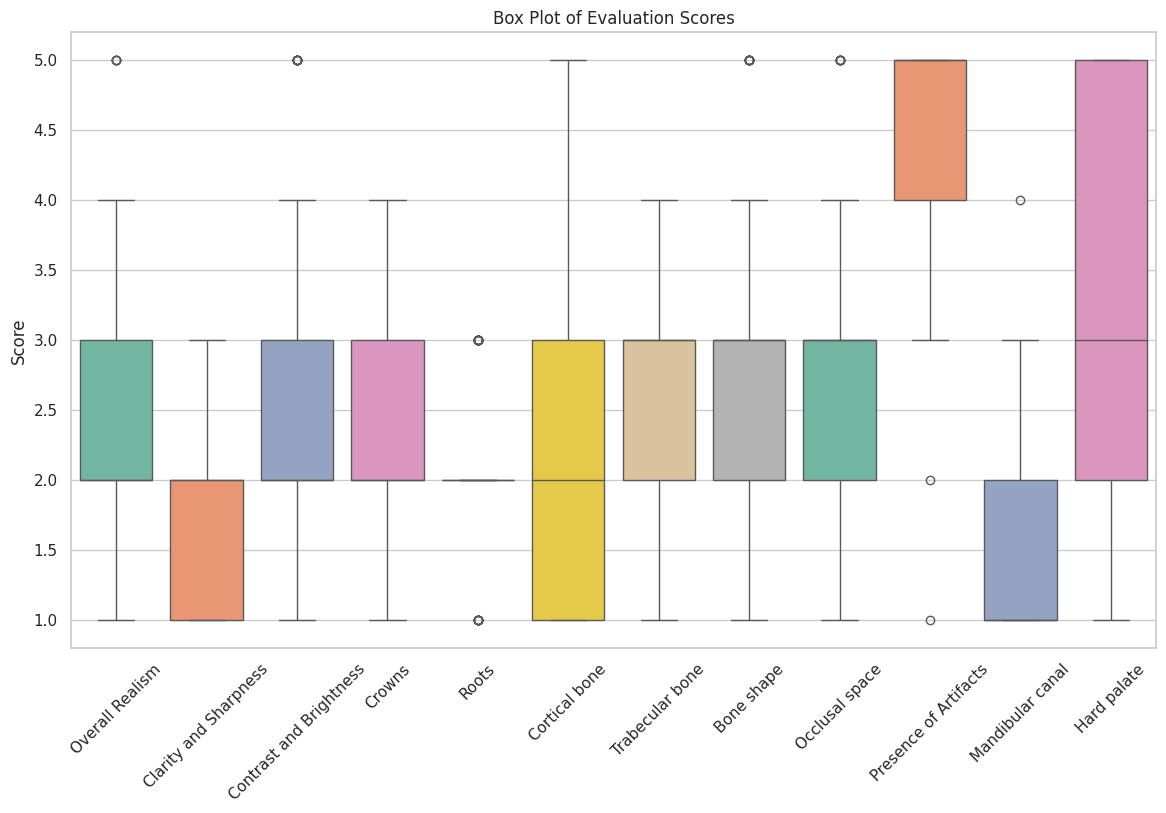

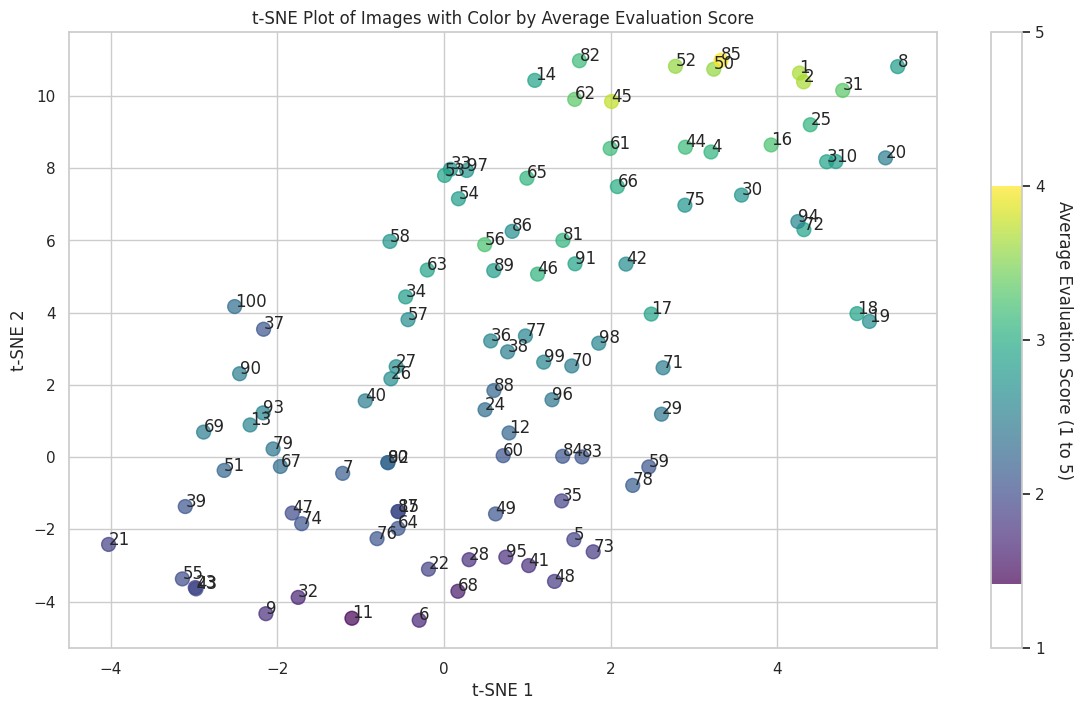

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5)
    plt.legend()
    plt.title('Distribution of Evaluation Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Evaluation Scores')
    plt.show()

# Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set2')
    plt.xticks(rotation=45)
    plt.title('Box Plot of Evaluation Scores')
    plt.ylabel('Score')
    plt.show()

# Plot 4: t-SNE Plot with Color Based on Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Compute average score for each image
    avg_scores = df[columns].mean(axis=1)

    # Plot t-SNE results with a colormap
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=avg_scores, cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file names
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]))

    # Add colorbar to show score range
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score (1 to 5)', rotation=270, labelpad=20)
    cbar.set_ticks(np.linspace(1, 5, 5))  # Set the ticks for 1 to 5 range

    plt.title('t-SNE Plot of Images with Color by Average Evaluation Score')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness', 'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape', 'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Ensure that the columns representing evaluation scores are within the range [1, 5]
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone',
           'Bone shape', 'Occlusal space', 'Presence of Artifacts',
           'Mandibular canal', 'Hard palate']

# Checking and ensuring scores are between 1 and 5
def check_score_range(df, columns):
    for column in columns:
        assert df[column].min() >= 1 and df[column].max() <= 5, f"Column {column} contains values out of the 1-5 range."

check_score_range(data, columns)

# Plot 4: t-SNE Plot with Color Based on Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Compute average score for each image
    avg_scores = df[columns].mean(axis=1)

    # Get the min and max of the average scores to scale color bar dynamically
    min_score, max_score = avg_scores.min(), avg_scores.max()

    # Plot t-SNE results with a colormap
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=avg_scores, cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file names (assuming filenames have numbers separated by underscores)
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)

    # Add colorbar, dynamically scaled according to min and max of average scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.mappable.set_clim(vmin=min_score, vmax=max_score)  # Dynamically set color limits
    cbar.set_ticks(np.linspace(min_score, max_score, 5))  # Set ticks for the range

    plt.title('t-SNE Plot of Images with Color by Average Evaluation Score', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    # plt.grid(True)

    # Save the figure as a PDF
    plt.savefig('tsne_plot_average_evaluation_score.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Calling the function to generate the t-SNE plot with dynamic color scaling
plot_tsne(data, columns)


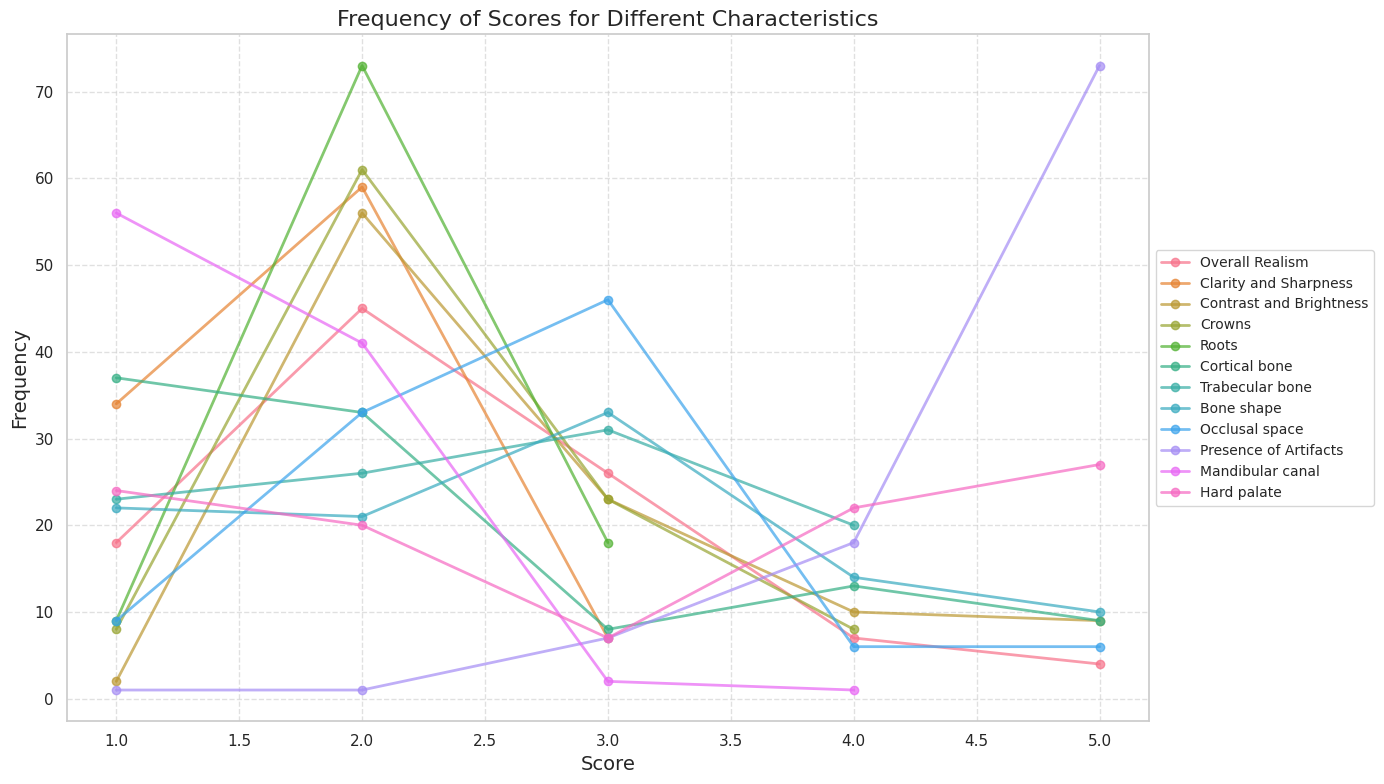

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample columns (replace with your actual characteristic columns)
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone',
           'Bone shape', 'Occlusal space', 'Presence of Artifacts',
           'Mandibular canal', 'Hard palate']

# Sample DataFrame (replace 'data' with your actual DataFrame)
# Assuming 'data' is already loaded and contains scores between 1 and 5 for the columns
# Frequency of scores for each characteristic
def plot_score_frequencies(df, columns):
    plt.figure(figsize=(14, 8))

    # Create a color palette
    palette = sns.color_palette("husl", len(columns))  # 'husl' ensures a wide range of distinct colors

    for idx, column in enumerate(columns):
        # Get the frequency of each score for the given characteristic
        score_counts = df[column].value_counts().sort_index()

        # Plot the frequency vs. score with lines and markers
        plt.plot(score_counts.index, score_counts.values,
                 label=column,
                 color=palette[idx],
                 marker='o',
                 alpha=0.7,
                 linewidth=2)

    # Enhance the plot aesthetics
    plt.title('Frequency of Scores for Different Characteristics', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add a legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to generate the improved frequency vs. score plot
plot_score_frequencies(data, columns)


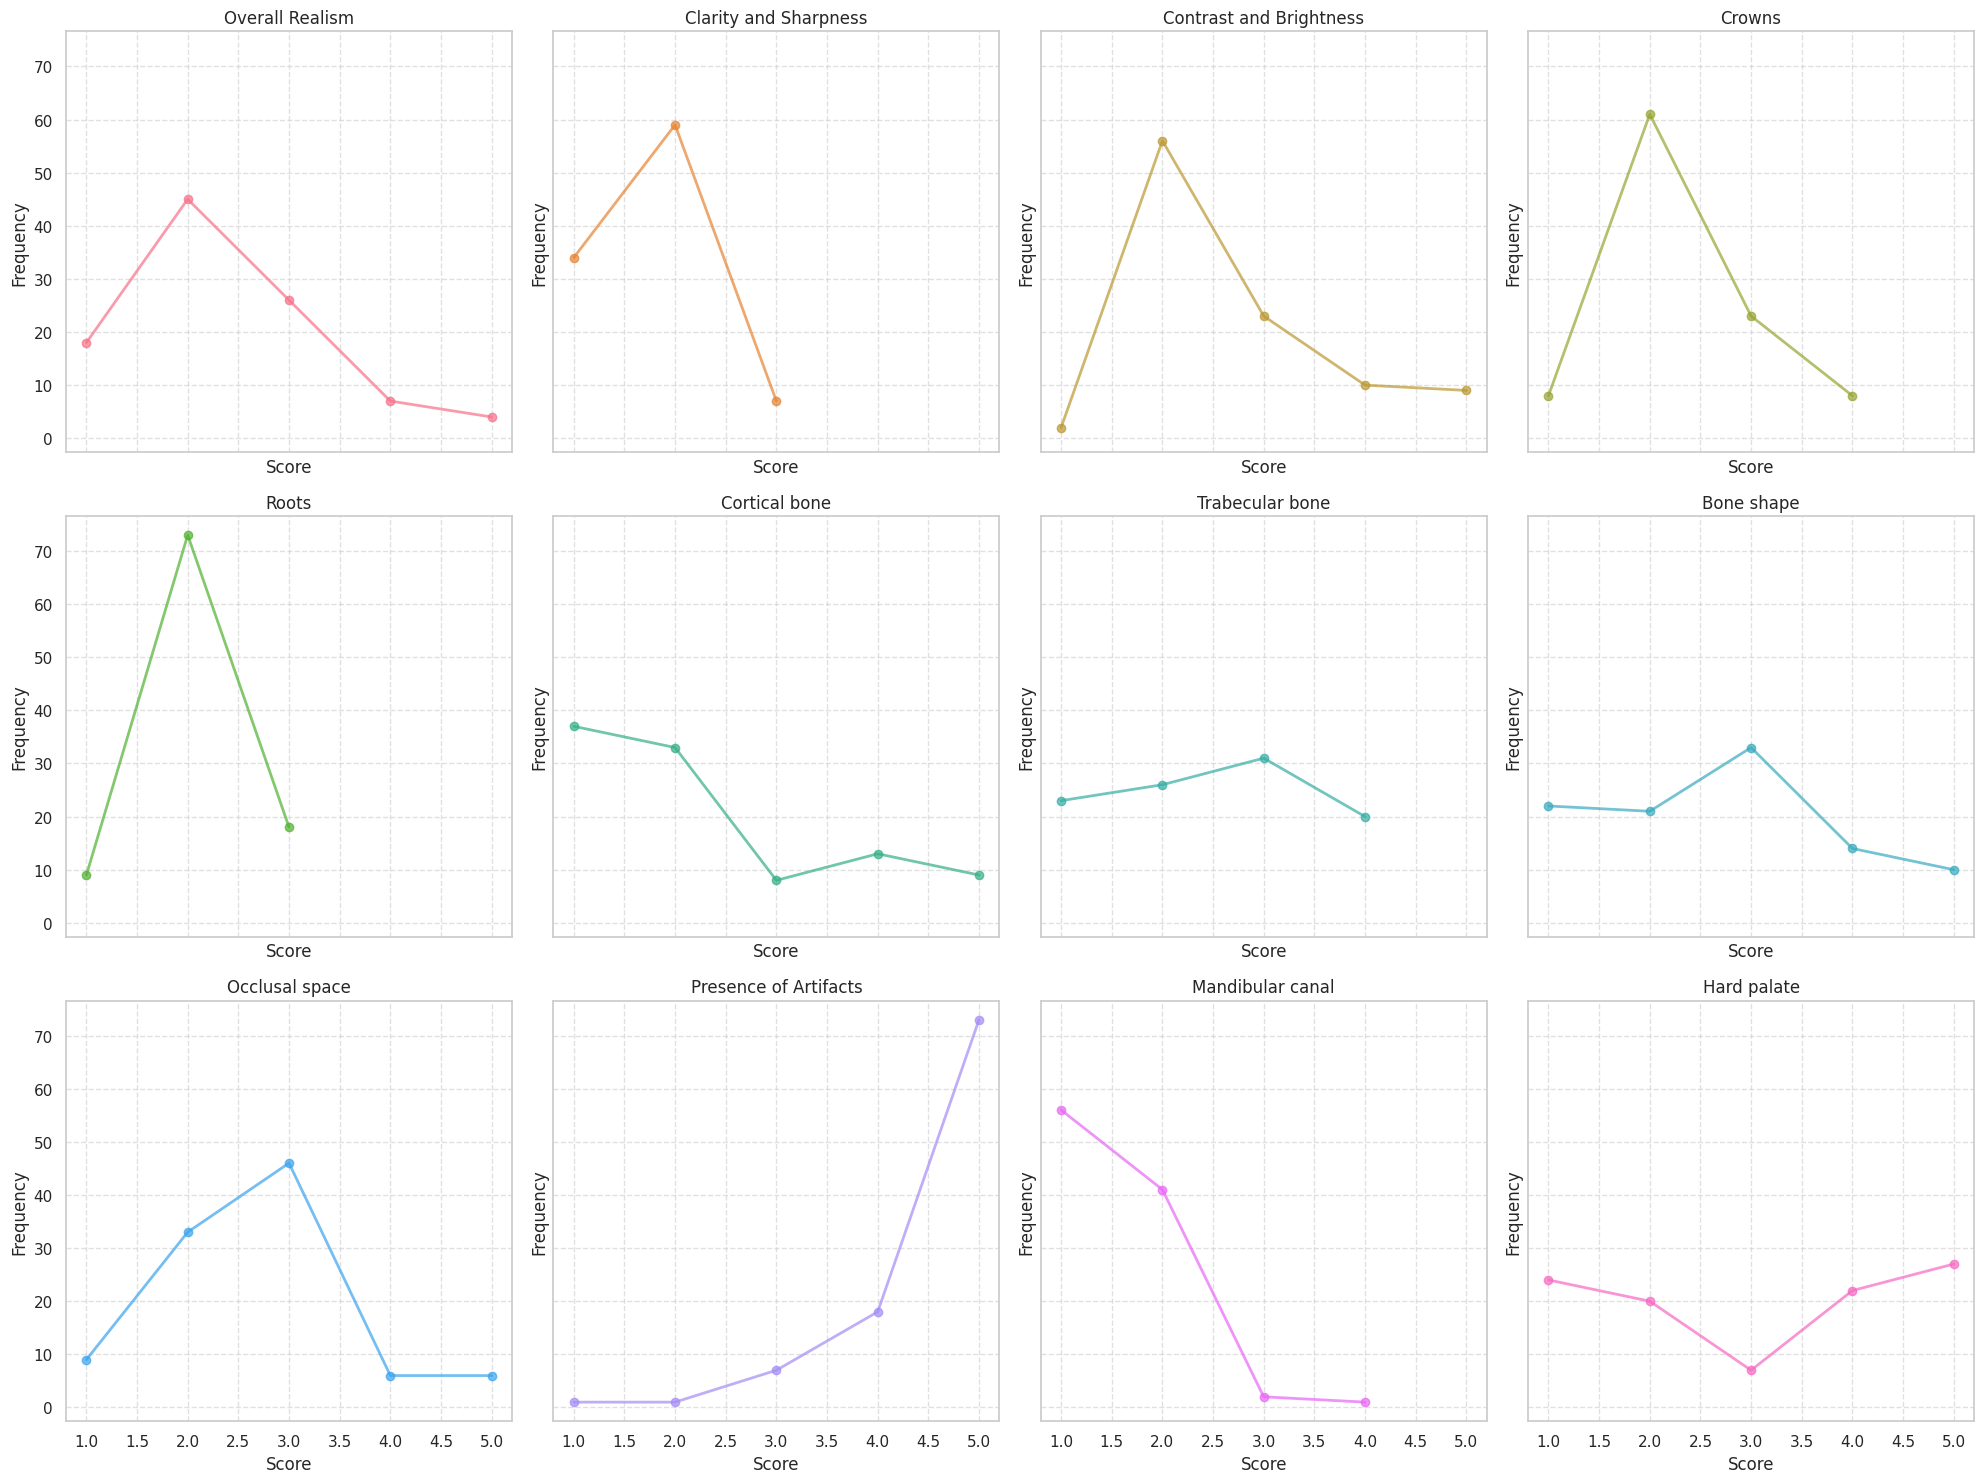

In [ ]:
def plot_score_frequencies_subplots(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 3) // 4  # 4 subplots per row

    fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows), sharex=True, sharey=True)
    axs = axs.flatten()

    palette = sns.color_palette("husl", len(columns))

    for idx, column in enumerate(columns):
        score_counts = df[column].value_counts().sort_index()

        axs[idx].plot(score_counts.index, score_counts.values,
                      label=column,
                      color=palette[idx],
                      marker='o',
                      alpha=0.7,
                      linewidth=2)

        axs[idx].set_title(column, fontsize=12)
        axs[idx].set_xlabel('Score')
        axs[idx].set_ylabel('Frequency')
        axs[idx].grid(True, linestyle='--', alpha=0.6)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Call the function to generate subplots
plot_score_frequencies_subplots(data, columns)


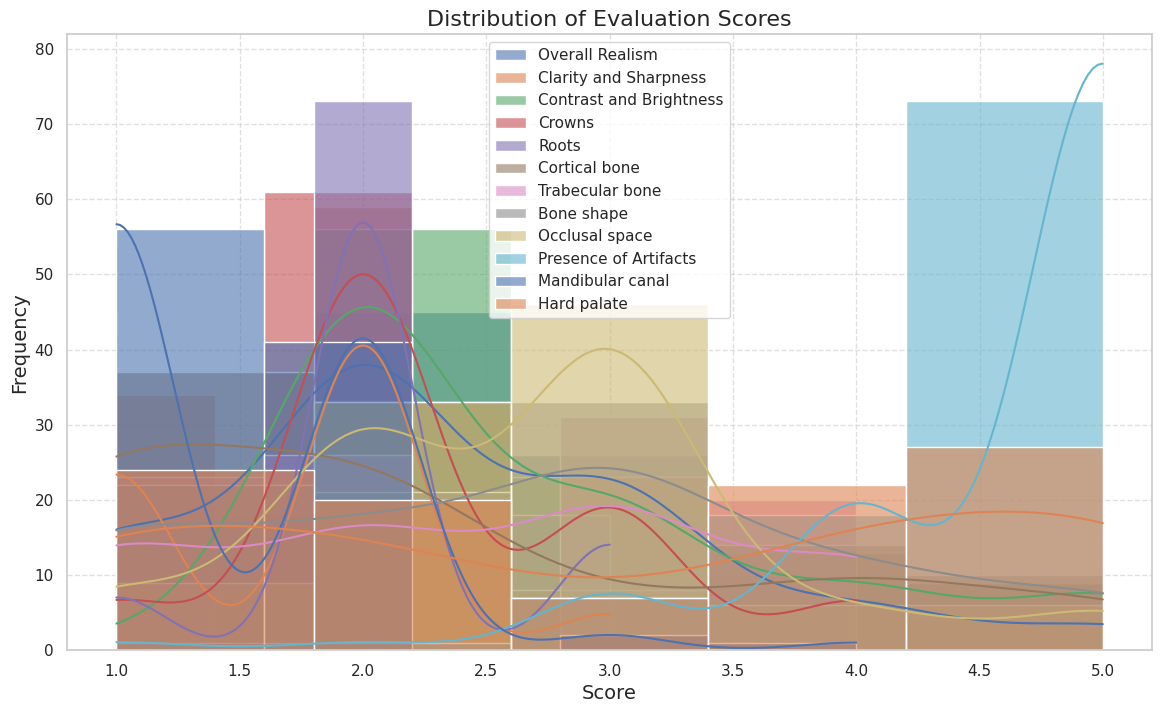

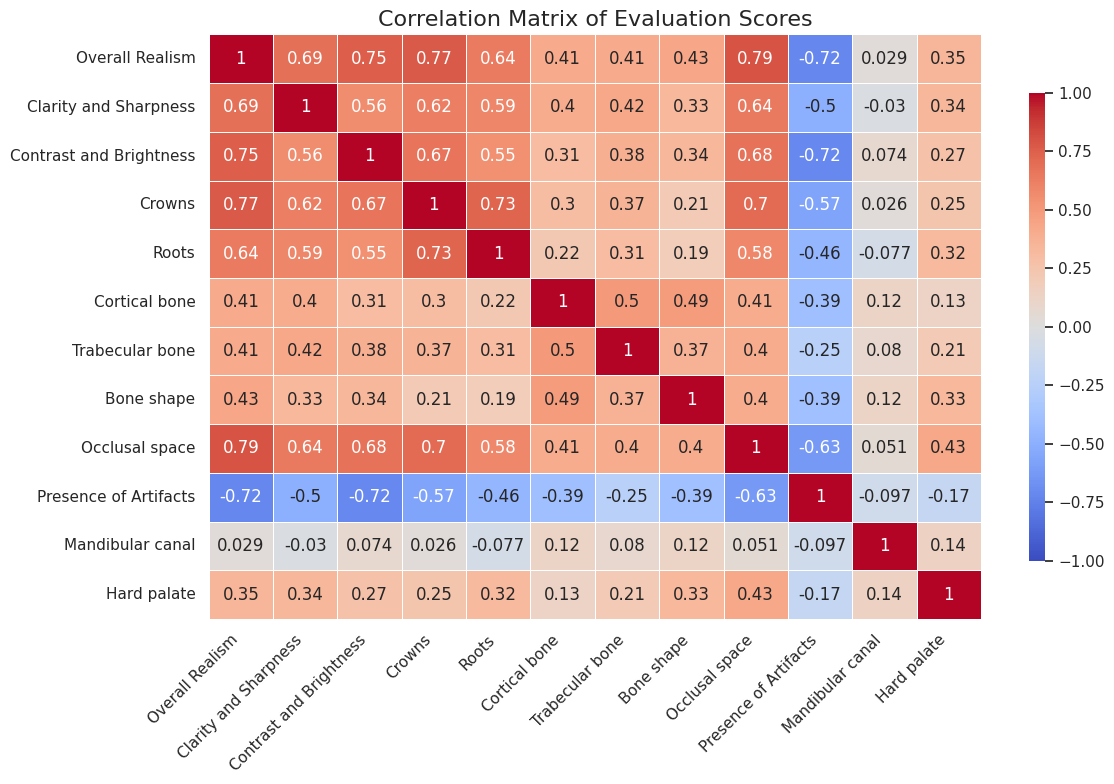

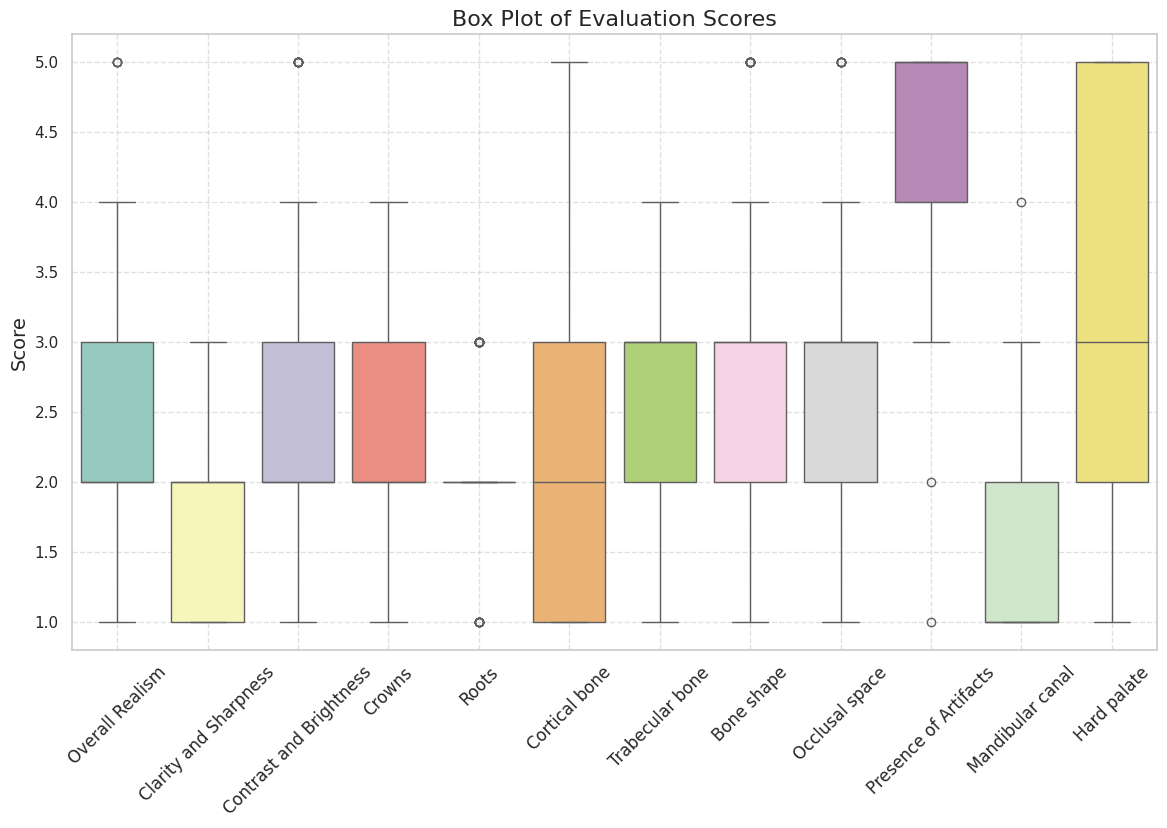

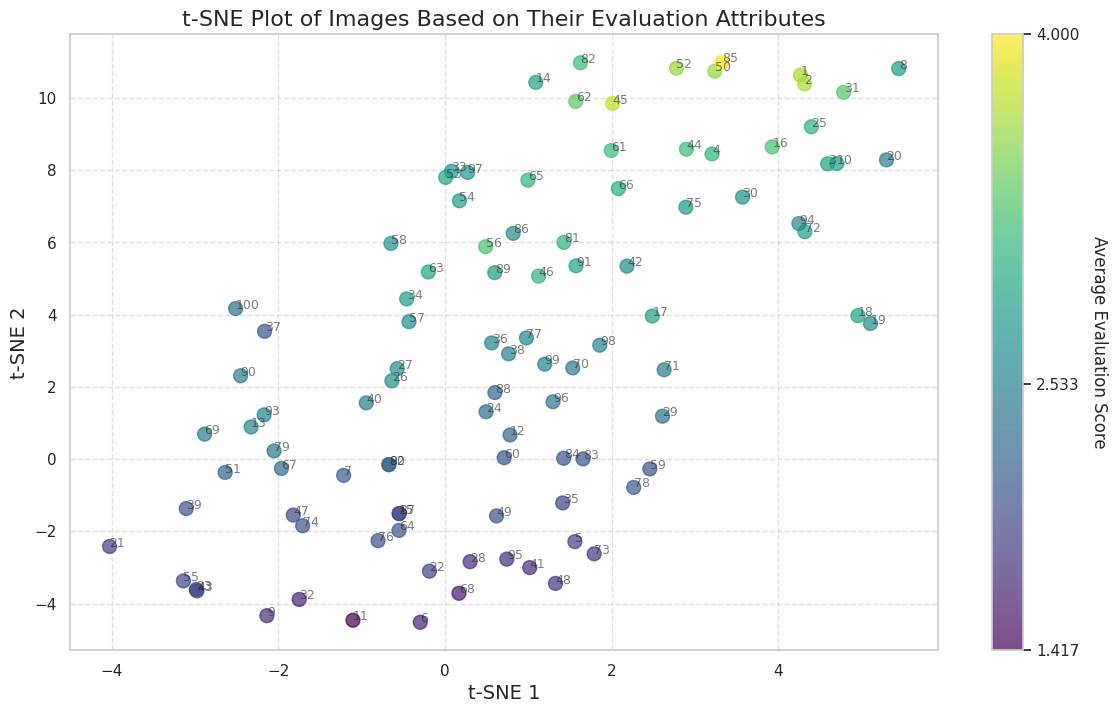

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))

    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


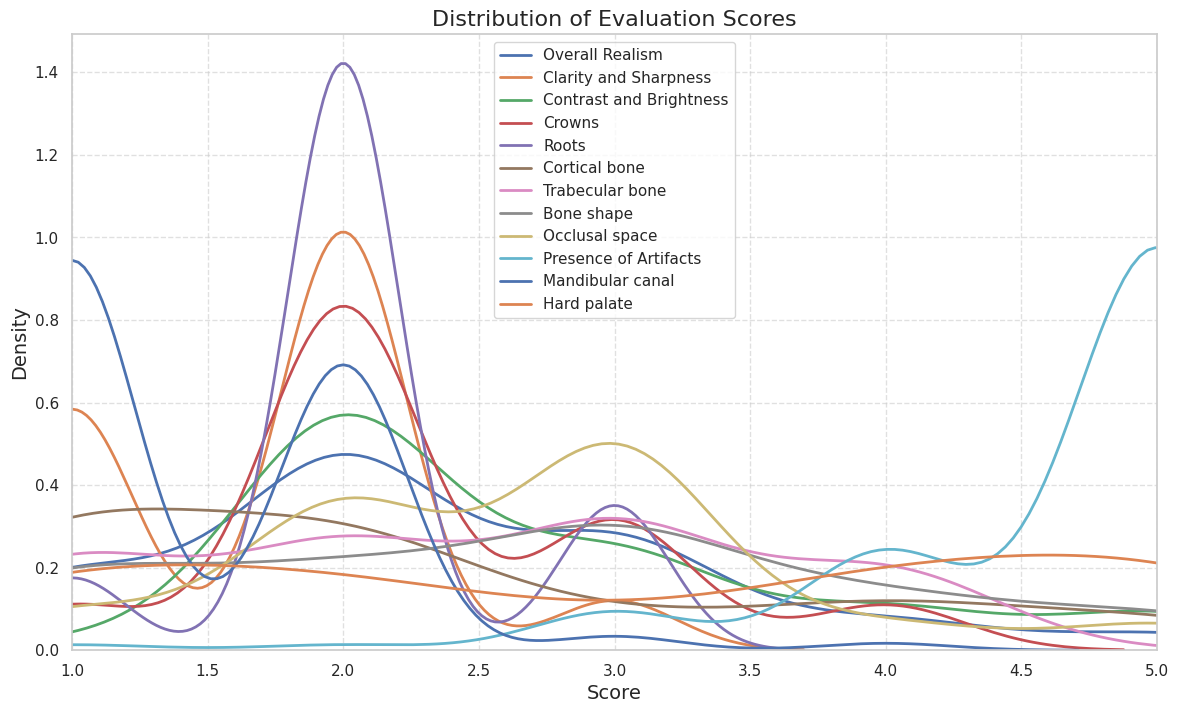

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores with Only Curves
def plot_distribution_curves_only(df, columns):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current axis

    for column in columns:
        # Plot the distribution curve using sns.kdeplot
        sns.kdeplot(df[column], label=column, linewidth=2)

    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(1, 5)  # Set x-limits to match the score range
    plt.ylim(0)  # Set y-limits to start from 0
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the function to generate the plot with only curves
plot_distribution_curves_only(data, columns)


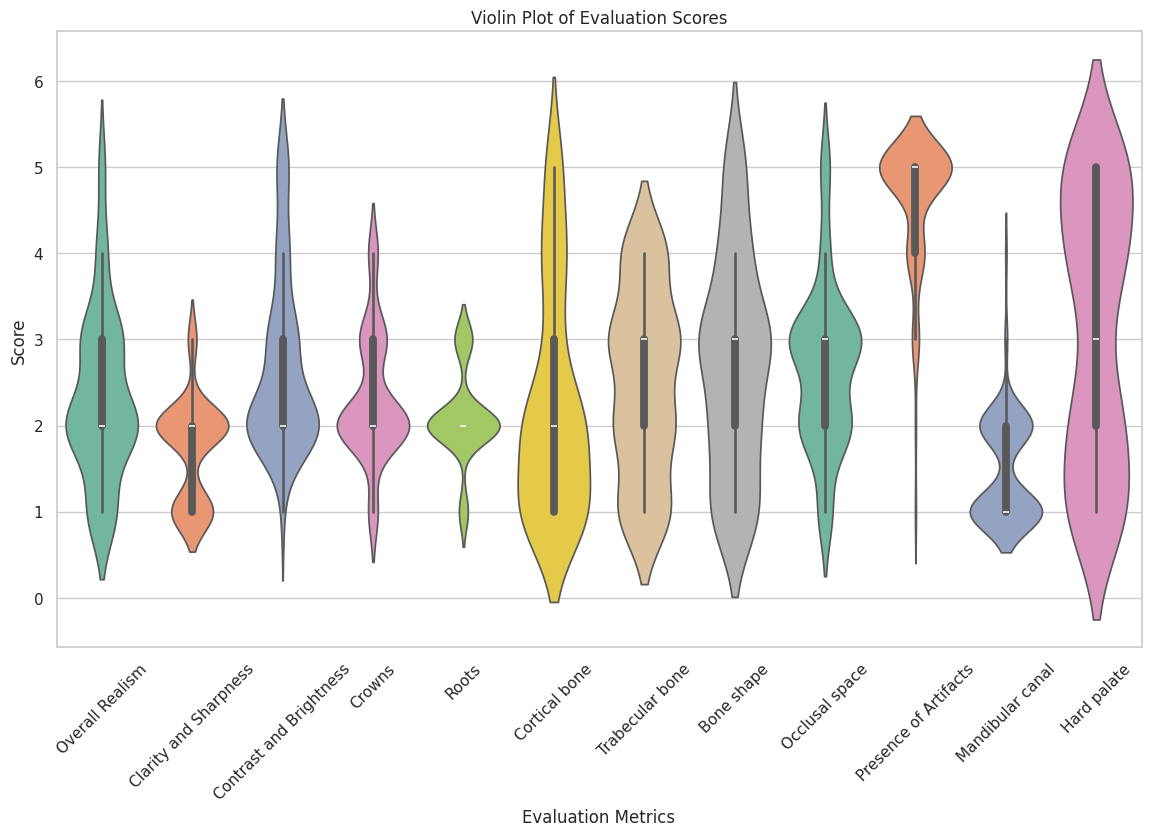

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=data[columns], palette='Set2')
plt.title('Violin Plot of Evaluation Scores')
plt.ylabel('Score')
plt.xlabel('Evaluation Metrics')
plt.xticks(rotation=45)

# Save the plot as a high-quality PDF
plt.savefig('violin_plot_evaluation_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()


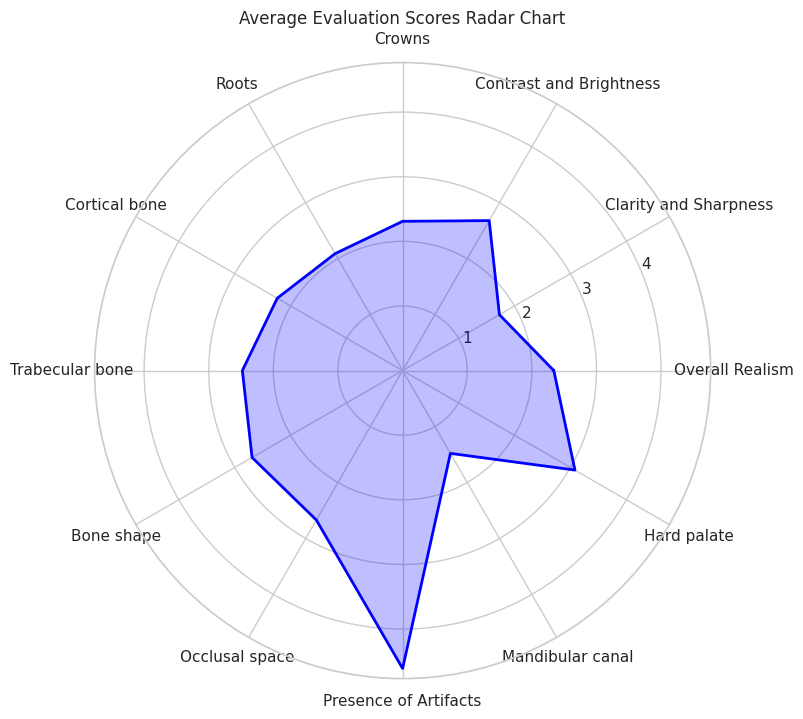

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

def plot_radar_chart(df, title):
    # Number of variables
    num_vars = len(columns)

    # Create a 2D array of the values
    values = df[columns].mean().values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle

    # Angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Add labels
    plt.xticks(angles[:-1], columns)
    ax.set_title(title)

    # Save the plot as a high-quality PDF
    plt.savefig('radar_chart_average_evaluation_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')

    plt.show()

# Call the radar chart function
plot_radar_chart(data, 'Average Evaluation Scores Radar Chart')


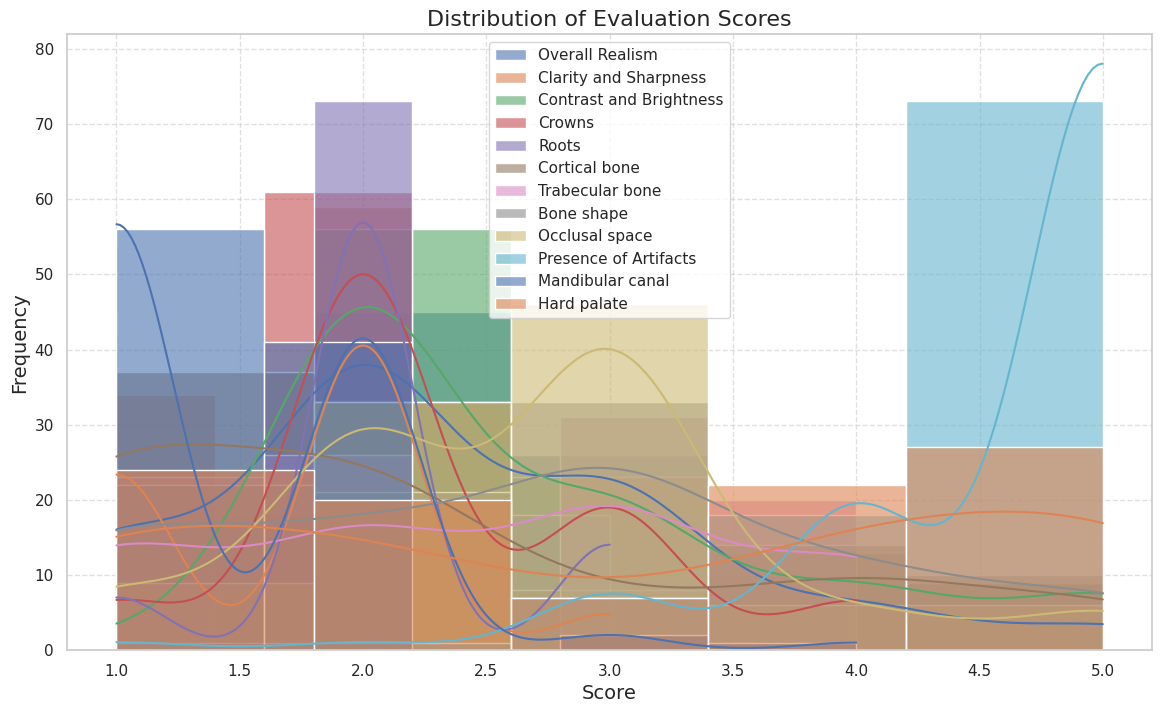

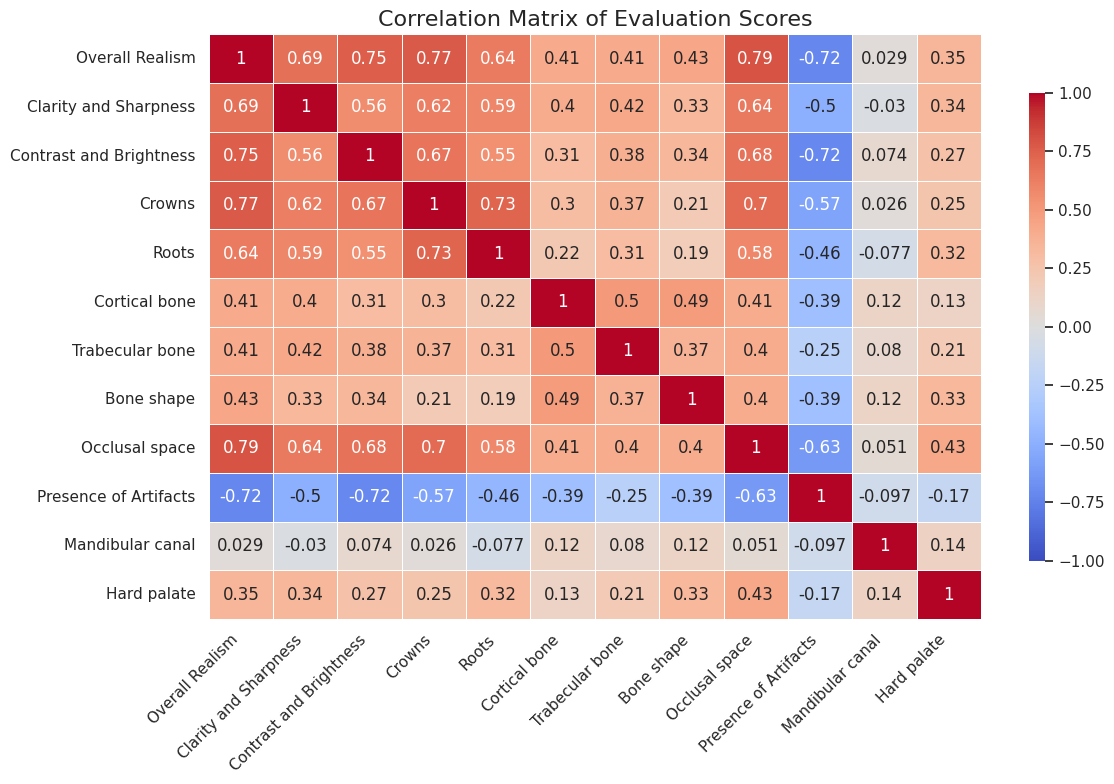

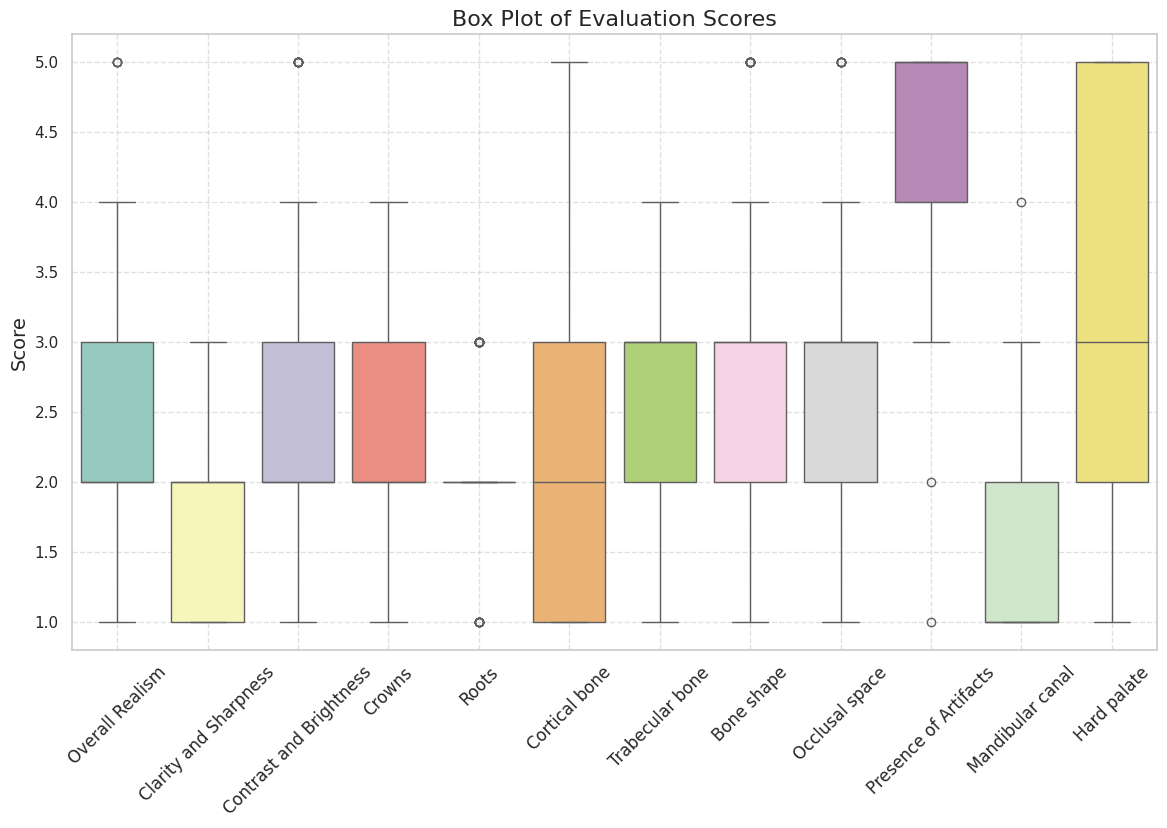

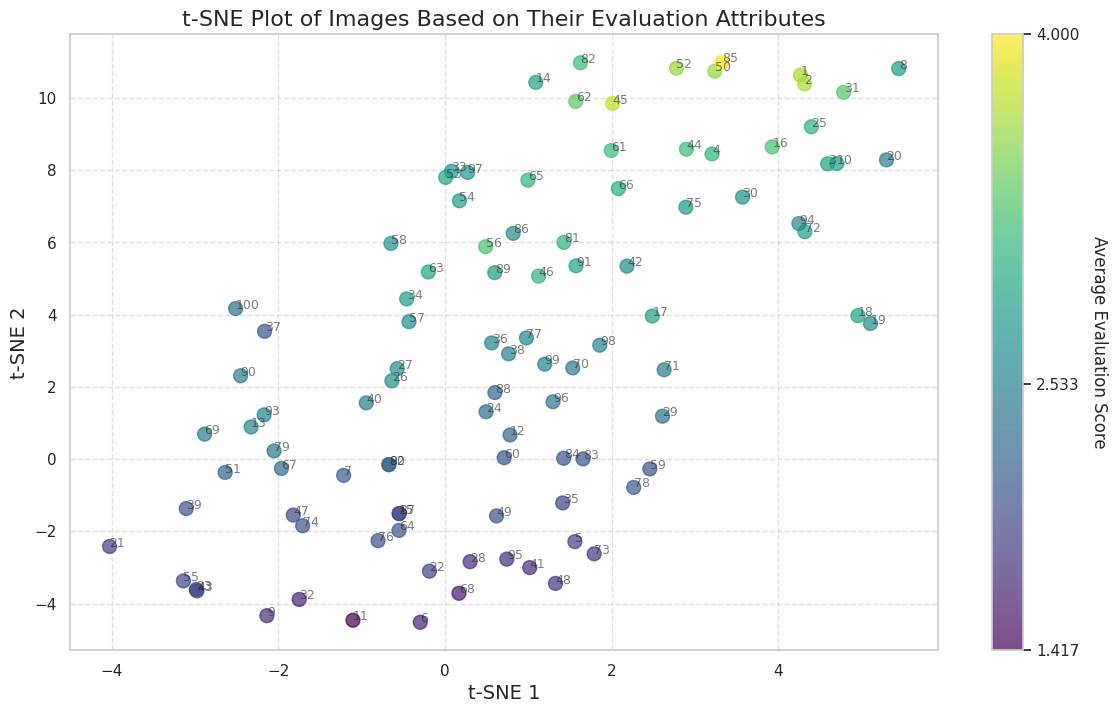

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))

    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Interactive t-SNE Plot
def interactive_tsne_plot(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Create a new DataFrame for Plotly
    tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
    tsne_df['img_file'] = df['img_file']
    tsne_df['average_score'] = df[columns].mean(axis=1)

    # Create the interactive scatter plot
    fig = px.scatter(tsne_df, x='tsne_1', y='tsne_2',
                     hover_name='img_file',
                     color='average_score',
                     color_continuous_scale='Viridis',
                     title='Interactive t-SNE Plot of Images Based on Their Evaluation Attributes')

    # Update hover information
    fig.update_traces(hovertemplate='<br>'.join([
        'Image: %{hovertext}',
        'Average Evaluation Score: %{customdata[0]:.2f}',
    ]), customdata=tsne_df[['average_score']].values)

    # Show the plot
    fig.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)

# Call the interactive t-SNE plot
interactive_tsne_plot(data, columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Presence of Artifacts', 'Mandibular canal', 'Hard palate']

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('distribution_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('correlation_matrix_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('box_plot_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('tsne_plot_of_images_based_on_evaluation_attributes.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)
